**Problem Statement**

Develop machine learning models to classify tweets as positive or negative sentiment

Team Members:

Anoushka Wadyalkar : UCE2022667

Madhushree Salvi : UCE2023017

Mansi Khandre : UCE2023022

**Introduction**

In an age dominated by social media, the analysis of user-generated content presents a valuable opportunity to gain insights into public sentiment and mental well-being. This project aims to harness the power of machine learning to address two critical tasks: sentiment analysis of tweets and the detection of mental health conditions based on user behavior.



---

* The first objective of this project is to classify tweets as either positive or negative, enabling a deeper understanding of public sentiment on various topics.
* The second aspect of this project focuses on determining the mental health condition of users through their online interactions.


---
Through this project, we aspire to contribute to both the fields of natural language processing and mental health awareness. By developing effective machine learning models for sentiment analysis and mental health detection, we aim to empower individuals, organizations, and healthcare professionals with valuable tools for understanding and supporting mental well-being in the digital age.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing the necessary modules

import numpy as np
import pandas as pd

import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


**About the dataset**

The dataset employed in this project is the sentiment140 dataset, comprising 1,600,000 tweets collected through the Twitter API. These tweets have been annotated, with a label of '0' indicating negative sentiment and '4' indicating positive sentiment. This dataset serves as a valuable resource for sentiment detection tasks.

Link: [Sentiment 140](https://www.kaggle.com/datasets/kazanova/sentiment140)

In [ ]:
# importing the dataset and printing head
data_columns = ["sentiment", "ids", "timestamp", "query", "user", "tweet"]
data_encoding = "ISO-8859-1"
df = pd.read_csv('/content/drive/MyDrive/ML project/training.1600000.processed.noemoticon.csv', encoding=data_encoding, names=data_columns)
df.head()

,sentiment,ids,timestamp,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**CODE**

* *Step 1*: Removing unnecessary columns from the dataset
* *Step 2*: Standardize the sentiment label

In [ ]:
# Removing the unnecessary columns and only keeping sentiment and tweet columns
df = df[['sentiment','tweet']]

# Replacing the values: 0 = negative, 4 = positive. We replace the value 4 with 1 to standardize the sentiment labels.
df['sentiment'] = df['sentiment'].replace(4,1)

<ipython-input-5-3697316f6200>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].replace(4,1)


* *Step 3*: Grouping the tweets based on their sentiment label (0, 1)
* *Step 4*: Plotting the tweets in each group (0 = Negative, 1 = Positive)

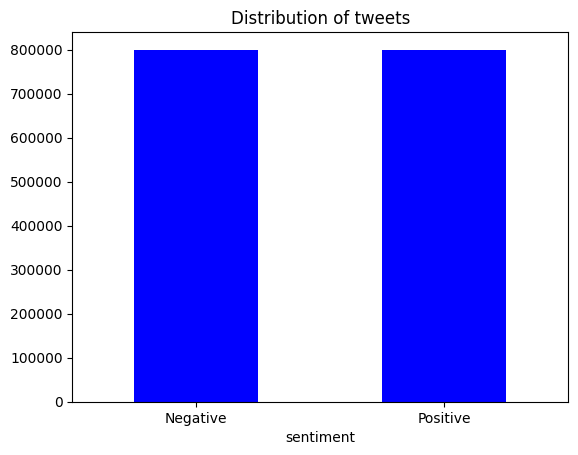

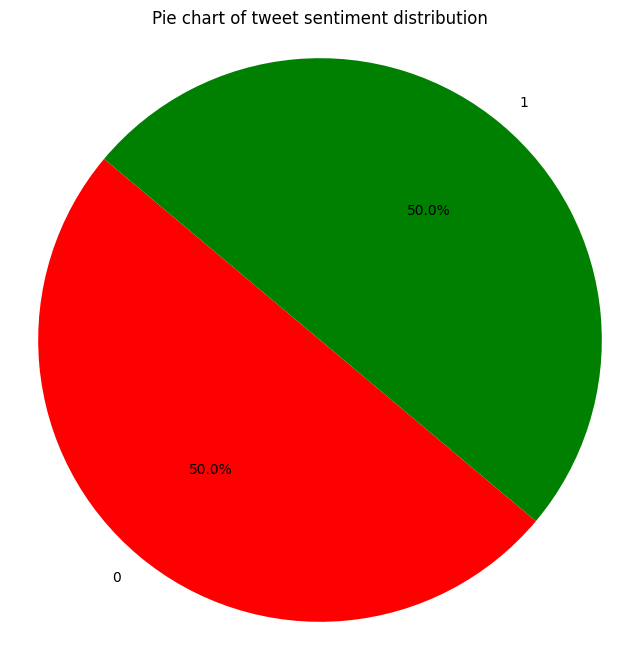

In [ ]:
# plotting grouping by negative and positive tweets
grouped_df = df.groupby('sentiment').count()

# Plotting the distribution of tweets
plot = grouped_df.plot(kind='bar', title='Distribution of tweets', legend=False, color='blue')
plot.set_xticklabels(['Negative', 'Positive'], rotation=0)

# Storing data in lists.
tweet, sentiment = list(df['tweet']), list(df['sentiment'])

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_df['tweet'], labels=grouped_df.index, autopct='%1.1f%%', startangle=140, colors=['red', 'green'])
plt.title('Pie chart of tweet sentiment distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**DATA PREPROCESSING**

* *Step 5*: Preprocess the text: Text preprocessing plays a pivotal role in Natural Language Processing, serving to refine textual data into a more manageable format conducive to enhanced performance of machine learning algorithms.
---
The preprocessing steps conducted include:

1. Conversion to Lowercase: Transforming each text to lowercase.
2. URL Replacement: Substituting URLs beginning with "http," "https," or "www" with "URL."
3. Emoji Replacement: Substituting emojis using a predefined dictionary mapping emojis to their meanings (e.g., ":)" becomes "EMOJIsmile").
4. Username Replacement: Replacing @Usernames with the word "USER" (e.g., "@Kaggle" becomes "USER").
5. Non-Alphabetic Character Removal: Substituting characters except digits and alphabets with a space.
6. Consecutive Letter Reduction: Replacing sequences of three or more consecutive letters with two letters (e.g., "Heyyyy" becomes "Heyy").
7. Short Word Removal: Eliminating words with a length of less than two characters.
8. Stopword Removal: Discarding English stopwords that contribute little to the sentence's meaning (e.g., "the," "he," "have").
9. Lemmatization: Transforming words into their base forms (e.g., “Great” becomes “Good”).


In [ ]:
# Defining dictionary containing all emojis with their meanings.
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad',
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed',
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink',
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}



In [ ]:
# Defining a list containing all stopwords in english.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

* *Step 6*: Import Natural Language Toolkit library

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

* *Step 7*: preprocess the data before analysing it

In [ ]:
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

def preprocess(textdata):
    processed_text = []

    # Create Lemmatizer
    word_lemmatizer = WordNetLemmatizer()

    # Define regex patterns
    url_pattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" # matches URLs
    user_pattern = '@[^\s]+' # Matches twitter usernames
    alpha_pattern = "[^a-zA-Z0-9]" # match non alphabetic characters
    sequence_pattern = r"(.)\1\1+" # Matches sequences of three or more consecutive characters.
    seq_replace_pattern = r"\1\1" #  Replacement pattern for consecutive characters.

    # iterate over each tweet in the list
    for tweet in textdata:

        # Convert to lower case completely
        tweet = tweet.lower()

        # Replace all URLs with 'URL'
        tweet = re.sub(url_pattern, ' URL', tweet)

        # Replace @USERNAME with 'USER'
        tweet = re.sub(user_pattern, ' USER', tweet)

        # Replace all non-alphabetic characters
        tweet = re.sub(alpha_pattern, " ", tweet)

        # Replace 3 or more consecutive letters by 2 letters
        tweet = re.sub(sequence_pattern, seq_replace_pattern, tweet)

        tweet_words = ''
        for word in tweet.split():
            # Lemmatize the word
            word = word_lemmatizer.lemmatize(word)
            tweet_words += (word + ' ')

        processed_text.append(tweet_words.strip())

    return processed_text

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
import time
t = time.time()
processed_text = preprocess(tweet)
print(f'Text Preprocessing complete.')
print(f'Time Taken: {round(time.time()-t)} seconds')

Text Preprocessing complete.
Time Taken: 141 seconds


**Analysis of Data**

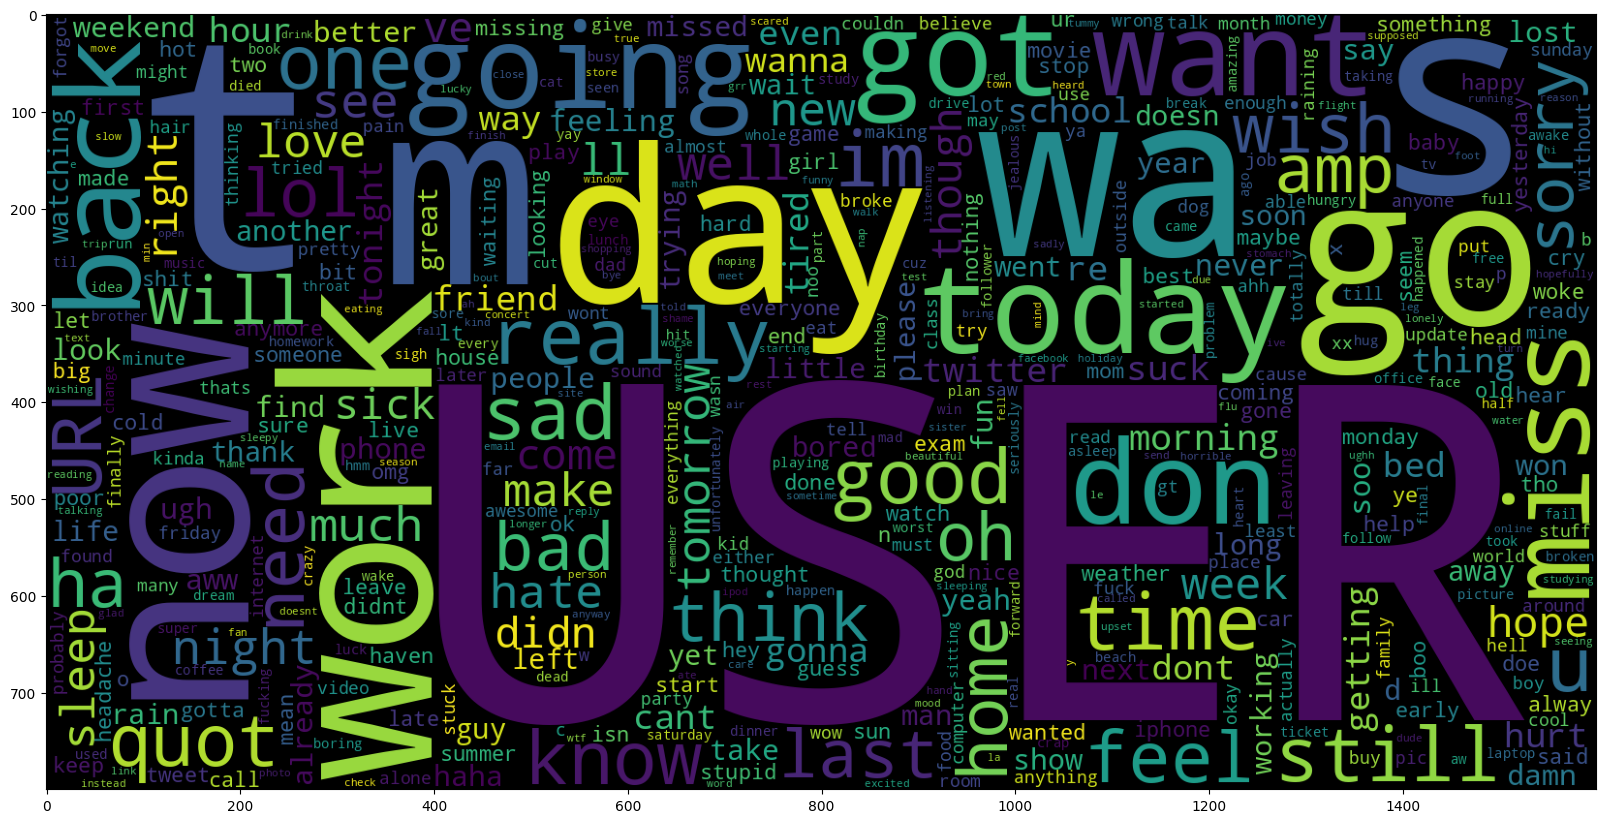

In [ ]:
#Analysing the data
#for negative
import matplotlib.pyplot as plt

data_neg = processed_text[:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

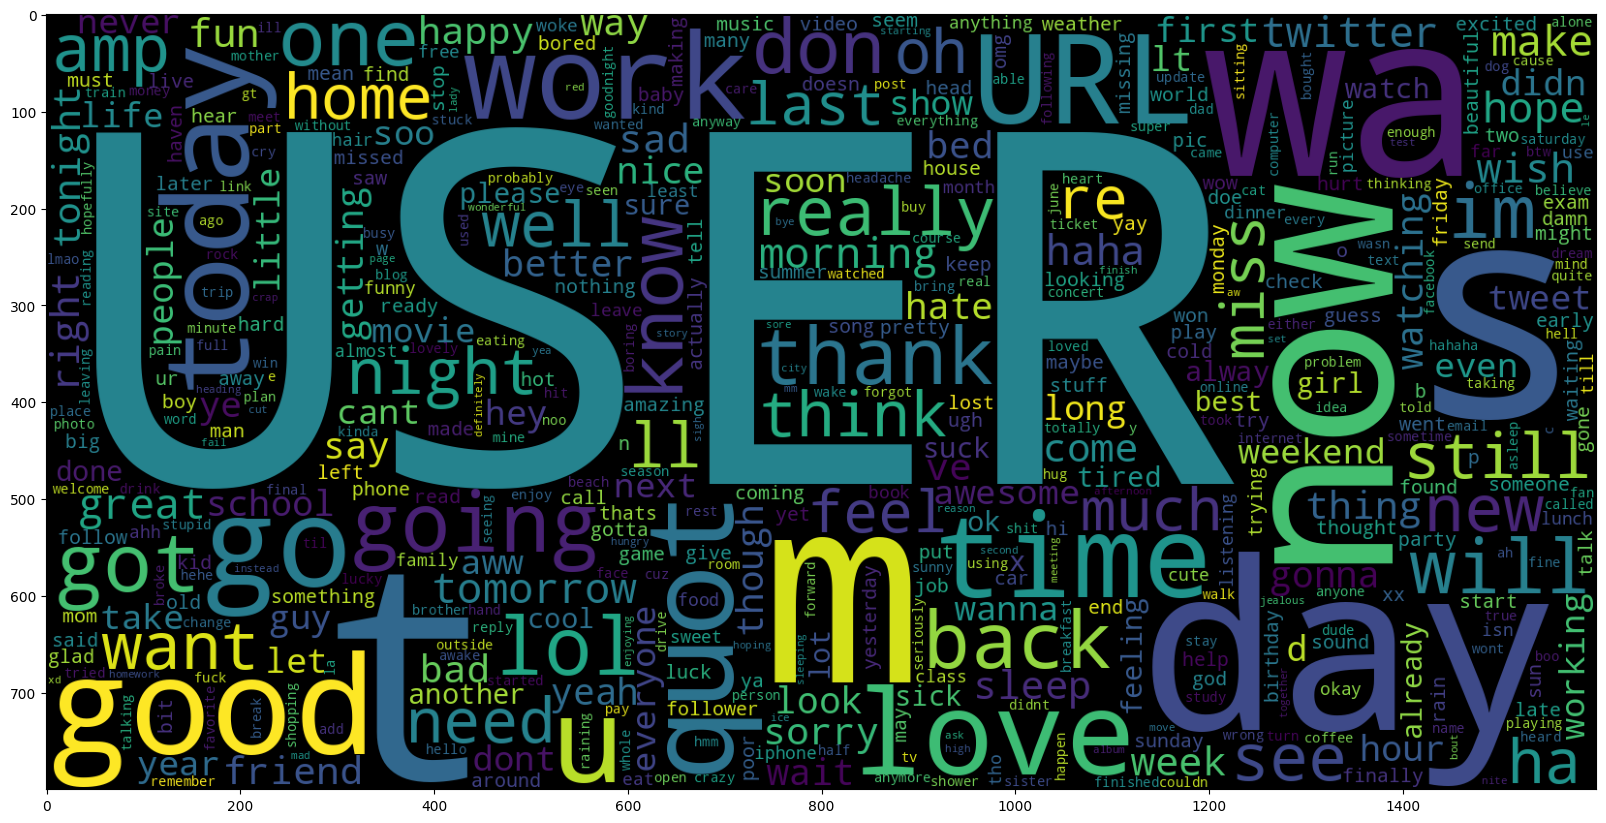

In [ ]:
#  for positive
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all processed text into a single string
all_text = " ".join(processed_text)

# Analysing the data for Positive sentiment
data_pos = processed_text[800000:]  # Slice the processed_text from index 800000 onwards
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=500, width=1600, height=800, collocations=False).generate(all_text)
plt.imshow(wc)
plt.show()


**Preparing the data for model training**

* *Step 8*: Split the data.

The Preprocessed Data is divided into 2 sets of data:

Training Data: The dataset upon which the model would be trained on. Contains 95% data.
Test Data: The dataset upon which the model would be tested against. Contains 5% data.

In [ ]:
from sklearn.model_selection import train_test_split
print(len(processed_text))
print(len(sentiment))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(processed_text, sentiment, test_size=0.05, random_state=42)
print(f'Data Split done.')


1600000
1600000
Data Split done.


* *Step 8*: Defiing a vectorizer the ML model can work with (*see appendix*)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vectorized = vectorizer.fit_transform(X_train)

print(f'Vectoriser fitted.')
print('No. of feature_words: ', len(vectorizer.vocabulary_))


Vectoriser fitted.
No. of feature_words:  3437103


* *Step 9*: We'll convert the X_train and X_test datasets into matrices of TF-IDF features using the TF-IDF Vectorizer. These transformed datasets will serve as inputs for training the model and evaluating its performance.

In [ ]:
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)
print(f'Data Transformed.')

Data Transformed.


* *Step 10*: Defining evaluation metric function.

Since our dataset is not skewed, i.e. it has equal number of Positive and Negative Predictions. We're choosing Accuracy as our evaluation metric. Furthermore, we're plotting the Confusion Matrix to get an understanding of how our model is performing on both classification types.

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def model_Evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test) # predict values for dataset
    accuracy = accuracy_score(y_test, y_pred) # print the evaluation metric for dataset
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)

    plt.xlabel('Predicted values', fontdict = {'size':14}, labelpad = 10)
    plt.ylabel('Actual values'   , fontdict = {'size':14}, labelpad = 10)
    plt.title ('Confusion Matrix', fontdict = {'size':18}, pad = 20)


* *Step 11*: We are creating a Logistic Regression model for our sentiment analysis problem.

Accuracy: 0.8271
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     39999
           1       0.82      0.83      0.83     40001

    accuracy                           0.83     80000
   macro avg       0.83      0.83      0.83     80000
weighted avg       0.83      0.83      0.83     80000



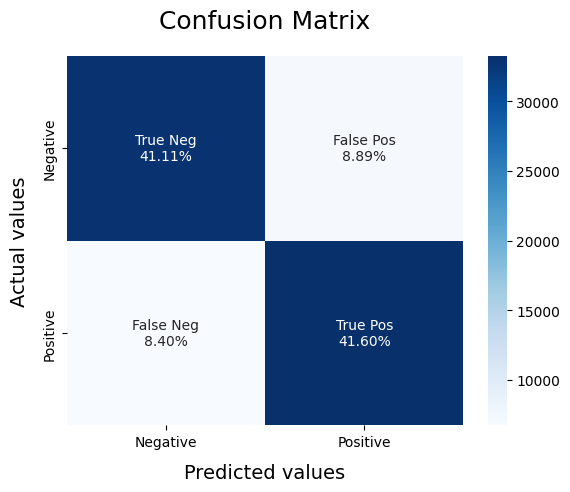

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
LRmodel = LogisticRegression(C=2, max_iter=1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel, X_test, y_test)


* *Step 12*: Saving the model

In [ ]:
#Saving the model
import pickle
file = open('vectorizer-ngram-(1,2).pickle','wb')
pickle.dump(vectorizer, file)
file.close()

file = open('Sentiment-LR.pickle','wb')
pickle.dump(LRmodel, file)
file.close()

In [ ]:
import os
print(os.getcwd())


/content


In [ ]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression



def save_models(vectoriser, LRmodel):
    # Save the vectoriser.
    file = open('/content/vectoriser-ngram-(1,2).pickle', 'wb')
    pickle.dump(vectoriser, file)
    file.close()

    # Save the LR Model.
    file = open('/content/Sentiment-LR.pickle', 'wb')
    pickle.dump(LRmodel, file)
    file.close()

    return vectorizer, LRmodel

def load_models():
    # Load the vectoriser.
    file = open('/content/vectorizer-ngram-(1,2).pickle', 'rb')
    vectoriser = pickle.load(file)
    file.close()

    # Load the LR Model.
    file = open('/content/Sentiment-LR.pickle', 'rb')
    LRmodel = pickle.load(file)
    file.close()

    return vectoriser, LRmodel

def predict(vectorizer, model, text):
    # Predict the sentiment
    textdata = vectorizer.transform(preprocess(text))
    sentiment = model.predict(textdata)

    # Make a list of text with sentiment.
    data = []
    for txt, pred in zip(text, sentiment):
        data.append((txt, pred))

    # Convert the list into a Pandas DataFrame.
    df = pd.DataFrame(data, columns=['text', 'sentiment'])
    df = df.replace([0, 1], ["Negative", "Positive"])
    return df

if __name__ == "__main__":
    # Load the models
    vectoriser, LRmodel = load_models()

    # Text to classify should be in a list.
    text = [
        "I hate twitter",
        "May the Force be with you.",
        "Mr. Stark, I don't feel so good"
    ]

    df = predict(vectoriser, LRmodel, text)
    print(df.head())


                              text sentiment
0                   I hate twitter  Negative
1       May the Force be with you.  Positive
2  Mr. Stark, I don't feel so good  Negative


***Appendix***

Lemmatization (step 7) is a natural language processing technique used to reduce words to their base or canonical form, known as the lemma. The lemma represents the dictionary form of a word, which is often a valid word in the language.

For example:

The lemma of the word "running" is "run".
The lemma of "went" is "go".
The lemma of "better" is "good".



---

TF-IDF Vetorizer: feature extraction technique widely used in natural language processing.


Term Frequency measures the frequency of a term (word) within a document.



---


TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)


Inverse Document Frequency measures the importance of a term across multiple documents.


IDF(t) = log((Total number of documents) / (Number of documents containing term t)) + 1

TF-IDF is obtained by multiplying the TF of a term by its IDF.
TF-IDF(t, d) = TF(t, d) * IDF(t)

Each document is represented as a vector where each dimension corresponds to a unique term in the entire corpus.
The value of each dimension in the vector is the TF-IDF score of the corresponding term in the document.

---
Logistic Regression:


Logistic Regression is a statistical method used for binary classification (here: Positive and Negative) tasks. It's commonly used when the dependent variable is categorical and binary, meaning it only has two possible outcomes. The goal of logistic regression is to predict the probability that a given input belongs to one of the two classes.

In logistic regression, the output of the model is transformed using the logistic function (also known as the *sigmoid function*) to ensure that the output falls between 0 and 1. This transformed output represents the probability that the input belongs to the positive class.

signoid function : f(x) = 1/(1+e^(-x))

**Conclusion**

In summary, this project focused on sentiment analysis of tweets using machine learning techniques. Through thorough data preprocessing and TF-IDF vectorization, tweets were transformed into numerical features, enabling the training of a logistic regression model for sentiment classification. The resulting model demonstrated promising performance in accurately categorizing tweets as positive or negative, showcasing the potential of machine learning in extracting insights from social media data. Future work may involve further refining the sentiment analysis model and exploring additional techniques for improved performance and broader applications.

**References**

[Logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[TF-IDF Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

[Kaggle notebook](https://www.kaggle.com/code/marianadeem755/exploring-twitter-sentiments-bilstm-logisticreg?rvi=1)